## Least-Square Linear Regression

You have heard about (linear) classification methods and least-squares linear regression in the lecture. 

__Task:__ Describe the difference between regression and classification in one sentence. 

    A: The outcome of regression is estimated quantitative data (i.e., the output is real valued, data measured on an interval scale), whereas, for classification it is qualitative/categorical data (i.e., integers that imply labels).

In the next part, we want to implement a least-squares linear regression. This means that given a set of points $\{\mathbf{x_i},y_i\}$, $i = 1..N$, we want to find that line (or hyperplane in higher dimensions) which minimizes the least-square error. The least-squares error measures the quadratic distance from the predicted points by the linear model to the actual values.

The general formula of the least-squares regression is $\mathbf{y} = \mathbf X \boldsymbol w+ \mathbf{\epsilon}$ where $\epsilon$ is a vector with dimensionality $\mathbb{R}^N$ containing the normally-distributed noise terms $N(0,\sigma^2)$, $\mathbf{y}$ is the vector of labels and $\mathbf{X}$ is the matrix of data points with dimensionality $\mathbb{R}^{NxD}$. We are interested in estimating the coefficients $\hat{\boldsymbol w}$ of the true coefficients $\boldsymbol w$. You saw in the lecture that the estimates are given by:

\begin{equation}
\hat{\boldsymbol w} = (\mathbf{X}^{\rm T}\mathbf{X})^{-1} \mathbf{X}^{\rm T}\mathbf{y}
\end{equation}

where $\mathbf{X}$ is the matrix of regressor data (the first column is all 1’s for the intercept), and $\mathbf{y}$ is the vector of the dependent variable data. 

__Tasks:__ 
1.  Look at how the following data is generated. What are the real parameters of w?
    
2.  We want to implement a least-square linear regression now. Follow the following steps:
    1. ) Bring the data in the correct shape as requested by the formula above.    
    2. ) Calculate the estimates of the coefficients w.
    3. ) Add the resulting line to the given scatter plot of the data.
    4. ) Compute the mean squared-error of the residuals, i.e. $ \frac{1}{N}\sum_{i=1}^N \|y(x_i) - y_i \|^2$.
    5. ) Compare your results to the numpy built-in function np.linalg.lstsq(...)
3. Plot the residuals (e.g. using seaborn function residplot (you will need to install statsmodel with '_sudo pip3 install statsmodels_' ) and check the conditions of the linear regression.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


Total difference from Numpy's weights: -0.00000

Difference from Numpy's RSS: 0.00000


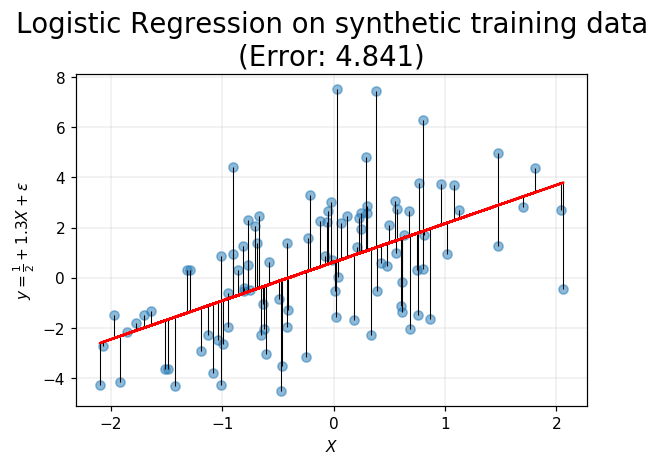

In [2]:
## Generate data
N_samples = 100
white_noise_stddev = 2
X = np.random.randn(N_samples, 1)  # x : 100,1)
eps = np.random.randn(N_samples, 1) * white_noise_stddev
# eps = np.random.normal(0, white_noise_stddev, (N_samples, 1)) # posiblly, has the same effect

w = [1.3]  # 1x1
y = 0.5 + w * X + eps  #w0 = 0.5


## Make Plot of the data
def Plot_0():
    plt.scatter(X, y)
    plt.xlabel(r"$X$")
    plt.ylabel(r"$y = \frac{1}{2} + 1.3X +\epsilon $")
    plt.grid()
    plt.show()


# Plot_0()

## 2. A) Bring the data in the correct shape

# Reshaping X to (N_samples+1, 1) to accomodate bias w0
X_ = np.hstack((np.ones((X.size, 1)), X))  # (N,2)

## B) Use the equation from above (X'X)^(-1)X'Y to calculate the estimate of the least-square coefficient:
#       X.T is the transpose of X
W = np.linalg.pinv(X_.T @ X_) @ X_.T @ y  # (2,1) = (2,2).(2,N).(N,1)
y_hat = X_ @ W  # (N,1) = (N,2).(2,1)

## C) Plot the resulting line
f = plt.figure(dpi=110)
plt.scatter(X, y, alpha=0.5)
plt.plot(X_[:, 1], y_hat, color="r")
plt.grid(lw=0.2)
plt.xlabel(r"$X$")
plt.ylabel(r"$y = \frac{1}{2} + 1.3X +\epsilon $")

## D) Compute the mean square-error (residual)
Err_vec = (y - y_hat)
Err = np.sum((1 / y.size) * Err_vec**2)
plt.title("Logistic Regression on synthetic training data" + "\n" +
          "(Error: {:.3f})".format(Err),
          fontsize=18)

## E) Compare to built-in function
# np.linalg.lstsq() solves a least squares problem
W_np, Err_np = np.linalg.lstsq(X_, y,rcond=None)[0:2:1]  # Only receive the first two outputs of the function
Err_np = Err_np / len(y)
print("\nTotal difference from Numpy's weights: {:.5f}".format(
    (W_np - W).sum()))
print("\nDifference from Numpy's RSS: {:.5f}".format(
    *abs(Err_np - Err)))

## 3) Plot the residuals
plt.vlines(X, y_hat, y_hat + Err_vec, lw=0.7)
plt.show()

## Mathematical concepts of linear regression

We want to look more closely at the mathematical backgrounds of the least-square linear regression. One step before obtaining the final solution $\hat{\boldsymbol w} = (\mathbf{X}^{\rm T}\mathbf{X})^{-1} \mathbf{X}^{\rm T}\mathbf{y}$, one has the so-called normal equations: \begin{equation}
(\mathbf{X}^{\rm T}\mathbf{X}) \hat{\boldsymbol w} = \mathbf{X}^{\rm T}\mathbf{y}
\end{equation}

### Q3.1.1 Which condition on X has to be satisfied such that $(\mathbf{X}^{\rm T}\mathbf{X})$ can be inverted?
    A: X should be a non-singular matrix. That is, it needs to be a full rank matrix.
    Revision: non-singular = invertible
    Revision: An invertible matrix is a matrix A that can be multiplied by a matrix B and we obtain the identity matrix I (here, both A and B are nxn matrices, thus B = A^-1).
    If A is an mxn matrix and rank(A) = n (n<=m) >> A has a left inverse such such that BA = I_n.
    If A is an mxn matrix and rank(A) = m (m<=n) >> A has a right inverse such that AB = I_m.
    Revision: The rank of a matrix A = dimension of vector space spanned by its columns; that is, the maximum number of linearily independet columns of A.
    A full rank matrix has the maximum amount of linearly independent vectors for its size.

### Q3.1.2 Name scenarios in which this condition is violated.
    A: If different attributes/features of X are just linear combination of other features of X, then X will be singular. In that case we would need to find the pseudoinverse.


In case, $(\mathbf{X}^{\rm T}\mathbf{X})$ is not invertible, one applies a so-called Moore-Penrose pseudoinverse. This is a generalization of the common matrix inversion to singular or non-quadratic matrices.

__Task__: Read about the pseudoinverse and list three properties of the pseudoinverse.

  A: <br>[1] The pseudoinverse $\mathbf{A}^+$ of an invertible matrix, is equivalent to its inverse.<br> 
      &nbsp;&nbsp;&nbsp;&nbsp; $\mathbf{A^+ = A^{-1}}$ <br>
   [2] The pseudoinverse of the pseudoinverse of a matrix is same as the original matrix.<br> &nbsp;&nbsp;&nbsp;&nbsp;$\mathbf{[A^{+}{]^{+}} = A}$<br>
   [3] The pseudoinverse of a scalar multiple of A is the reciprocal multiple of $A^+$.<br>  &nbsp;&nbsp;&nbsp;&nbsp;$\mathbf{{(\alpha A)}^+ = \alpha^{-1} A^{+}}$

## The role of outliers in least-square linear regression 

Sometimes the data is not as clean as in the above case. In the following data set, we added one additional point [45,12] to the previous data set. We want to investigate how this point influences the estimates of $\mathbf w$ and find a strategy to avoid any occurring problems.

__Tasks:__
1. Apply a least square linear estimator to the new data set and visualize the results
2. Compare the estimator for w with the one from before.
3. Plot the residuals, i.e. the difference between the predicted variable $y(x_i)$ and real variable $y_i$.
4. In the lecture you have heard several conditions on the residual which should be satisfied for the linear regression. Check them in this case! 
    <br><br>A:<br>Assumption 1: The expected sum of all residual errors is null. <br>Assumption 2: The residual errors are uncorrelated and share the same variance. <br>Assumption 3: The residual errors follow a normal distribution. The errors seem to be distributed randomly around the regression line. At least visually, we can assume that they follow a normal distribution.
    <br><br>? ? The variance of the residuals appears to be larger than the variance of the Normal Distribution used for initialising the noise-term (eps). This violates assuption #2! In simple terms, residuals are correlated. :-) ? ?

__Hint__: You should re-run the simulation a few times to answer question number 4).

In [3]:
%reset -f -s
import numpy as np
import matplotlib.pyplot as plt

Std[1] =  1.8594028000774439
Std[2] =  2.4777226201129467


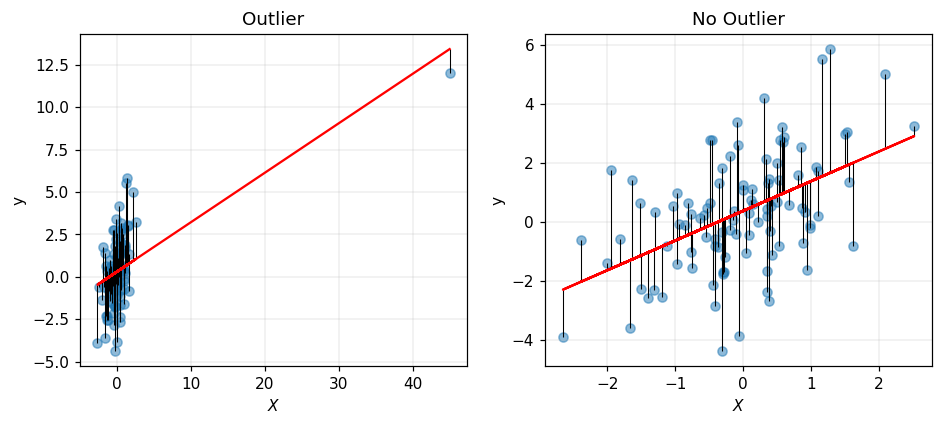

In [14]:
## Data Generation as before plus one outlier [45,12]
n = 100
white_noise_sd = 2
X = np.random.randn(n,1)
eps = np.random.randn(n,1)*white_noise_sd
w = [1.3]
y = 0.5+w*X+eps
X_ = X; y_ = y
X = np.append(X,45).reshape((len(X)+1, 1))
y = np.append(y,12)

# print(X.shape)

def do_linReg(X, y):
    # Reshaping X to (N_samples+1, 1) to accomodate bias w0
    X_ = np.hstack((np.ones(X.shape), X))  # (N,2)

    # 1) Apply a least square linear estimator to the new data set
    W = np.linalg.pinv(X_.T @ X_) @ X_.T @ y  # (2,1) = (2,2).(2,N).(N,1)
    y_hat = X_ @ W  # (N,1) = (N,2).(2,1)
    return X_, y_hat

X, y_hat = do_linReg(X, y)
X_, y_hat_ = do_linReg(X_, y_)

# 2) Compare estimator for w and visualize the results
def calc_err(y_hat, s):
    Err_vec = (y - y_hat)
    Err = np.sum((1 / y.size) * Err_vec**2)
    #         print("E[e] : ",np.mean(Err_vec))
    print("Std["+str(s)+"] = ", np.std(Err_vec, ddof=0))
    return Err_vec

Err_vec=calc_err(y_hat,1)
Err_vec_=calc_err(y_hat_, 2)

# 3) Plot the residuals
# You can use the seaborn plot residplot (statsmodels package is necessary. Get it via: ""sudo pip3 install statsmodels"")
def plot_it(ax, X, y, y_hat, Err_vec, tiit):
    
    ax.scatter(X[:,1], y, alpha=0.5)
    ax.plot(X[:,1], y_hat, color="r")
    ax.vlines(X[:,1], y_hat, y_hat + Err_vec, lw=0.7)
    ax.grid(lw=0.2)
    ax.set_xlabel(r"$X$")
    ax.set_ylabel("y")    
    ax.set_title(tiit)


    
f = plt.figure(dpi=110, figsize=(10,4))
ax = f.add_subplot(121)
plot_it(ax, X, y, y_hat, Err_vec, "Outlier")

ax = f.add_subplot(122)
plot_it(ax, X_, y_, y_hat_, Err_vec_, "No Outlier")
plt.show()



### Q3.1.3 What do you conclude from this example regarding the estimated weight vector and residuals?
The weight vector seems to be doing (should be doing) a good job at setting the slope of the regression line.
We selected w in such a way, that the residual errors are minimized for our dataset X. That is argminw ((y-Xw))^2. 

### Q3.1.4 Think of possible strategies to avoid this problem.
A: We can penalise large weight vectors by making use of strategies such as regularisation. We can penalize residual errors differently by using different loss functions such as L2, L1 or Huber loss (that is, a combination of L2 and L1). There are some approaches that impose pentalties on both weights and residual errors (Ridge or Lasso regression just to name a couple).
Elaborated: L2 loss squares the found error. Thus, whenever it encouters epsilon > 1 it increases a lot (that is, outliers are treated more strongly). If there is an outlier in the data, this error will be very high. In such a case, L1 (which uses the absolute difference) would be better as abs(epsilon) < epsilon^2 for epsilon > 1. The Huber loss uses L2 for smaller and L1 for larger residual errors.